In [7]:
import numpy as np
import tensorflow as tf
import pandas as pd
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import pickle as pkl

In [37]:
def fetch_data(filename):
    path = "data/"+filename
    data = pd.read_csv(path)
    print(data.tail())
    return data
    
stock_symbol = "AAPL"
data = fetch_data(stock_symbol+".csv")
print(data.info())
print()

            Date        Open        High         Low       Close   Adj Close  \
2111  2018-05-23  186.350006  188.500000  185.759995  188.360001  188.360001   
2112  2018-05-24  188.770004  188.839996  186.210007  188.149994  188.149994   
2113  2018-05-25  188.229996  189.649994  187.649994  188.580002  188.580002   
2114  2018-05-29  187.600006  188.750000  186.869995  187.899994  187.899994   
2115  2018-05-30  187.720001  188.000000  186.779999  187.500000  187.500000   

        Volume  
2111  19467900  
2112  23234000  
2113  17461000  
2114  22514100  
2115  18690500  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 7 columns):
Date         2116 non-null object
Open         2116 non-null float64
High         2116 non-null float64
Low          2116 non-null float64
Close        2116 non-null float64
Adj Close    2116 non-null float64
Volume       2116 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 115.8+ KB
None


In [38]:
validation_size = 10
test_size = 10

In [39]:
df = data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2.116000e+03
mean,92.471142,93.265225,91.628398,92.467380,81.943020,8.336299e+07
std,39.552352,39.834265,39.306142,39.577620,44.730267,6.026138e+07
min,27.481428,28.000000,27.178572,27.435715,18.501446,1.147590e+07
25%,60.108213,60.639286,59.793928,60.054643,43.655062,3.693832e+07
50%,89.858570,90.694999,89.067859,89.930713,68.658501,6.802040e+07
75%,116.535000,117.440002,115.602497,116.425003,111.827623,1.113250e+08
max,189.490005,190.369995,187.860001,190.039993,189.309998,4.702495e+08


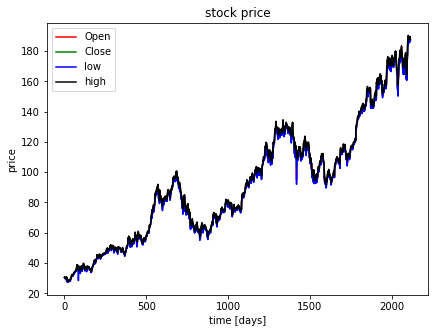

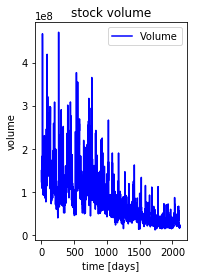

In [42]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df['Open'], color='red', label='Open')
plt.plot(df['Close'], color='green', label='Close')
plt.plot(df['Low'], color='blue', label='low')
plt.plot(df['High'], color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

plt.subplot(1,2,2);
plt.plot(df['Volume'], color='blue', label='Volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');
plt.show()

In [54]:
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df.Close.values.reshape(-1,1))
    return df

In [57]:
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(validation_size/100*data.shape[0]));  
    test_set_size = int(np.round(test_size/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]


df_stock = df
#df_stock.drop(['Adj Close'],1,inplace = True)
#df_stock.drop(['Volume'],1,inplace = True)
#df_stock.drop(['Date'],1,inplace = True)
cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)


cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# create train, test data
seq_len = 20 # ch
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
1
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['Open', 'High', 'Low', 'Close']
df_stock.columns.values =  ['Open', 'High', 'Low', 'Close']
x_train.shape =  (1676, 19, 4)
y_train.shape =  (1676, 4)
x_valid.shape =  (210, 19, 4)
y_valid.shape =  (210, 4)
x_test.shape =  (210, 19, 4)
y_test.shape =  (210, 4)


In [58]:
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

In [59]:
n_steps = seq_len-1
n_inputs = 4
n_neurons = 200
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

In [60]:
tf.reset_default_graph()

In [61]:
X = tf.placeholder(tf.float32,[None, n_steps, n_inputs])
y = tf.placeholder(tf.float32,[None,n_outputs])

layers = [tf.contrib.rnn.BasicRNNCell(num_units = n_neurons,activation = tf.nn.elu)
          for layer in range(n_layers)]

In [62]:
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)

In [63]:
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.343977/0.527944
4.98 epochs: MSE train/valid = 0.000179/0.000410
9.96 epochs: MSE train/valid = 0.000147/0.000336
14.95 epochs: MSE train/valid = 0.000113/0.000265
19.93 epochs: MSE train/valid = 0.000091/0.000108
24.91 epochs: MSE train/valid = 0.000092/0.000139
29.89 epochs: MSE train/valid = 0.000082/0.000123
34.87 epochs: MSE train/valid = 0.000122/0.000379
39.86 epochs: MSE train/valid = 0.000072/0.000083
44.84 epochs: MSE train/valid = 0.000065/0.000096
49.82 epochs: MSE train/valid = 0.000070/0.000188
54.80 epochs: MSE train/valid = 0.000137/0.000445
59.79 epochs: MSE train/valid = 0.000076/0.000081
64.77 epochs: MSE train/valid = 0.000057/0.000065
69.75 epochs: MSE train/valid = 0.000084/0.000218
74.73 epochs: MSE train/valid = 0.000052/0.000073
79.71 epochs: MSE train/valid = 0.000051/0.000091
84.70 epochs: MSE train/valid = 0.000062/0.000148
89.68 epochs: MSE train/valid = 0.000052/0.000098
94.66 epochs: MSE train/valid = 0.000053/0.000093
99.

correct sign prediction for close - open price for train/valid/test: 0.62/0.54/0.40


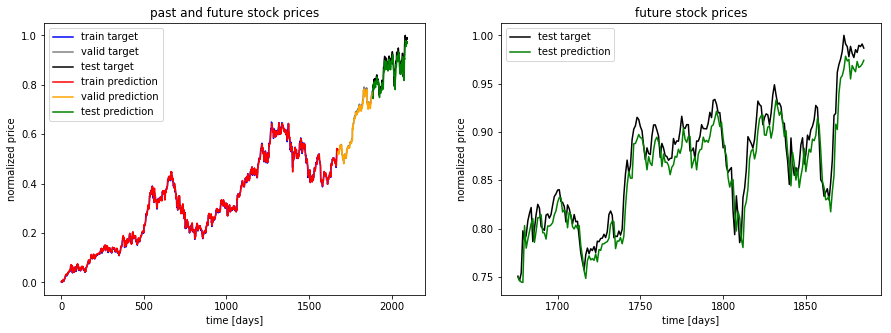

In [67]:
ft = 3 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))